**Eugen Ehrlich im Web of Science und in OpenAlex**

This notebook ...

# Preparation

In [ ]:
# Uncomment and run once
# if you use vanilla python:
#!pip install py2neo python-dotenv pandas
# OR if you use anaconda:
#!conda install -c conda-forge py2neo python-dotenv
#!conda install panda
# for table of contents support, see
# https://github.com/ipython-contrib/jupyter_contrib_nbextensions

Import the required libraries and setup needed objects:

In [3]:
# config
from dotenv import dotenv_values
config = {**dotenv_values()}

# https://py2neo.org/v4/
from py2neo import Graph, Node, Relationship
graph = Graph(config['NEO4J_URL'])

# visualization
from scripts.vis import draw, table

# clean up visualization HTML dir
from pathlib import Path
import shutil
figure_dir = Path('figure')
if figure_dir.exists() and figure_dir.is_dir():
    shutil.rmtree(figure_dir)
figure_dir.mkdir()

# Web of Science

KB -> Neo4J

## Overview

In [4]:
cypher = """
use `ehrlich-wos`
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
where a1.display_name = "ehrlich, eugen"
return count(distinct w1) as works_cited,
    count(distinct r2) as num_citations,
    count(distinct w2) as citing_works,
    count(distinct a2) as citing_authors
"""
graph.run(cypher).data()

[{'works_cited': 33,
  'num_citations': 34,
  'citing_works': 25,
  'citing_authors': 37}]

## Cited works

In [5]:
cypher = """
use `ehrlich-wos`
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
where a1.display_name = "ehrlich, eugen"
return distinct a1.display_name as author, w1.year as year, w1.title as title order by w1.year
"""
graph.run(cypher).to_data_frame()

,author,year,title
0,"ehrlich, eugen",1893,no_title
1,"ehrlich, eugen",1906,die freie rechtsfindung
2,"ehrlich, eugen",1913,no_title
3,"ehrlich, eugen",1914,professor ehrlich's seminary of living law
4,"ehrlich, eugen",1916,montesquieu and sociological jurisprudence
5,"ehrlich, eugen",1916,das recht und die gesellschaft
6,"ehrlich, eugen",1917,judicial freedom of decision: its principles a...
7,"ehrlich, eugen",1921,judicial freedom of decision: principles and o...
8,"ehrlich, eugen",1922,the sociology of law
9,"ehrlich, eugen",1929,no_title


## Citing works

In [6]:
cypher = """
use `ehrlich-wos`
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.display_name = "ehrlich, eugen"
WITH w2, COLLECT(a2)[0] AS first_author
RETURN first_author.display_name AS author, w2.year AS year, w2.title AS title
ORDER BY w2.year
"""
graph.run(cypher).to_data_frame()

,author,year,title
0,"tamanaha, bz",2011,a vision of social-legal change: rescuing ehrl...
1,"krieger, linda h.",2011,when organizations rule: judicial deference to...
2,"wilder, colin f.",2012,teaching old dogs new tricks: four motifs of l...
3,"trajkovic, marko s.",2012,the realistic concept of the law
4,"kuenzler, adrian",2012,judicial legitimacy and the role of courts: ex...
5,"tamanaha, brian z.",2013,law's history: american legal thought and the ...
6,"martin, kimberly h.",2013,"social organization, collective sentiment, and..."
7,"exner, gudrun",2013,"the ""soziologische gesellschaft in wien"" [soci..."
8,"maurer, andreas",2013,the concept of participation in the making of ...
9,"zumbansen, peer",2013,law and legal pluralism: hybridity in transnat...


# OpenAlex

openalex.org -> neo4j

## Overview

In [7]:
cypher = """
use `ehrlich-openalex`
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
where a1.display_name = "ehrlich, eugen"
return count(distinct w1) as works_cited,
    count(distinct r2) as num_citations,
    count(distinct w2) as citing_works,
    count(distinct a2) as citing_authors
"""
graph.run(cypher).data()

[{'works_cited': 18,
  'num_citations': 402,
  'citing_works': 355,
  'citing_authors': 394}]

## Cited works (all years)

In [8]:
cypher = """
use `ehrlich-openalex`
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
match (w1)-[r4:PUBLISHED_IN]->(v1:Venue)
where a1.display_name = "ehrlich, eugen"
return distinct
    a1.display_name as author,
    w1.year as year,
    w1.title as title,
    v1.name as container,
    count(r2) as citations
order by citations desc
"""
graph.run(cypher).to_data_frame()

,author,year,title,container,citations
0,"ehrlich, eugen",1989,grundlegung der soziologie des rechts.,american journal of international law,145
1,"ehrlich, eugen",1938,fundamental principles of the sociology of law,university of chicago law review,138
2,"ehrlich, eugen",1922,the sociology of law,harvard law review,118
3,"ehrlich, eugen",1937,fundamental principles of the sociology of law,routledge ebooks,45
4,"ehrlich, eugen",1916,montesquieu and sociological jurisprudence,harvard law review,39
5,"ehrlich, eugen",1986,gesetz und lebendes recht,duncker & humblot ebooks,13
6,"ehrlich, eugen",1967,recht und leben,duncker & humblot ebooks,10
7,"ehrlich, eugen",1992,hans kelsen und die rechtssoziologie : auseina...,scientia verlag ebooks,5
8,"ehrlich, eugen",1913,soziologie des rechts,veit ebooks,4
9,"ehrlich, eugen",2003,rechtssoziologie und rechtswissenschaft : eine...,nomos ebooks,3


## Cited works (1960-1989)

In [9]:
cypher = """
use `ehrlich-openalex`
match (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
where a1.display_name = "ehrlich, eugen" and w2.year >= 1960 and w2.year <= 1990
return distinct
    a1.display_name as author,
    w1.year as year,
    w1.title as title,
    count(r2) as citations
order by citations desc
"""
graph.run(cypher).to_data_frame()

,author,year,title,citations
0,"ehrlich, eugen",1922,the sociology of law,20
1,"ehrlich, eugen",1938,fundamental principles of the sociology of law,16
2,"ehrlich, eugen",1989,grundlegung der soziologie des rechts.,6


## Citing works (all years)


In [10]:
cypher = """
use `ehrlich-openalex`
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.display_name = "ehrlich, eugen"
WITH w1, w2, COLLECT(a2)[0] AS first_author
RETURN
    first_author.display_name AS author,
    w2.year AS year,
    w2.title AS title,
    w1.title as cited_work
ORDER BY w2.year
"""
graph.run(cypher).to_data_frame()

,author,year,title,cited_work
0,"mannheim, hermann",1925,"die zwecke der rechtsmittel, insbesondere der ...",grundlegung der soziologie des rechts.
1,"otaka, tomoo",1932,die innere struktur des sozialen verbandes,grundlegung der soziologie des rechts.
2,"krader, lawrence",1960,the transition from serf to peasant in eastern...,fundamental principles of the sociology of law
3,"falk, richard a.",1961,"the relations of law to culture, power, and ju...",fundamental principles of the sociology of law
4,"chiba, m.",1962,right and duty,grundlegung der soziologie des rechts.
...,...,...,...,...
397,"geslin, albane",2022,dépasser les frontières disciplinaires dans la...,fundamental principles of the sociology of law
398,"rodi, michael",2022,theory of state decision-making,grundlegung der soziologie des rechts.
399,"scheiwe, kirsten",2022,"familie, gesellschaft und familienrecht",grundlegung der soziologie des rechts.
400,"botero-bernal, andrés",2022,el derecho social y la comunicación de ideas j...,fundamental principles of the sociology of law


## Citing works (1960-1989)

In [11]:
cypher = """
use `ehrlich-openalex`
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.display_name = "ehrlich, eugen" and w2.year > 1967 and w2.year < 1990
WITH w1, w2, COLLECT(a2)[0] AS first_author
RETURN
    first_author.display_name AS author,
    w2.year AS year,
    w2.title AS title,
    w1.title as cited_work
ORDER BY w2.year
"""
graph.run(cypher).to_data_frame()

,author,year,title,cited_work
0,"kulcsár, kálmán",1968,studies in the sociology of law in hungary,the sociology of law
1,"hahm, pyong choon",1969,religion and law in korea,fundamental principles of the sociology of law
2,"koch, klaus-friedrich",1969,law and anthropology: notes on interdisciplina...,fundamental principles of the sociology of law
3,"rueschemeyer, dietrich",1970,sociology of law in germany,grundlegung der soziologie des rechts.
4,"silva, edward f.",1970,states and the nation: state cohorts and amend...,the sociology of law
5,"ritterband, paul",1970,"law, policy, and behavior: educational exchang...",fundamental principles of the sociology of law
6,"gibbons, don l.",1971,observations on the study of crime causation,the sociology of law
7,"osborne, harry",1972,the use of sociological data in the judicial p...,fundamental principles of the sociology of law
8,"bonn, robert l.",1972,arbitration: an alternative system for handlin...,fundamental principles of the sociology of law
9,"pepinsky, harold b.",1973,the people v. the principle of legality in the...,the sociology of law


## Citing journals, all years

In [12]:
query = """
use `ehrlich-openalex`
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)-[r3:PUBLISHED_IN]-(v1:Venue)
WHERE a1.display_name = "ehrlich, eugen"
with w1, v1, count(r2) as num_citations
where num_citations > 1
RETURN  v1.name AS container,
        num_citations,
        w1.title as cited_work
order by num_citations desc
"""
graph.run(query).to_data_frame()

,container,num_citations,cited_work
0,cambridge university press ebooks,22,grundlegung der soziologie des rechts.
1,cambridge university press ebooks,20,montesquieu and sociological jurisprudence
2,social science research network,15,fundamental principles of the sociology of law
3,springer ebooks,14,grundlegung der soziologie des rechts.
4,law & society review,6,the sociology of law
5,springer ebooks,5,gesetz und lebendes recht
6,law & society review,5,fundamental principles of the sociology of law
7,social science research network,4,fundamental principles of the sociology of law
8,springer ebooks,3,recht und leben
9,zeitschrift für rechtssoziologie,3,grundlegung der soziologie des rechts.


## Graph: Citing journal, all years

In [13]:
query = """
use `ehrlich-openalex`
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)-[r3:PUBLISHED_IN]-(v1:Venue)
WHERE a1.display_name = "ehrlich, eugen"
with w1, v1, count(r2) as num_citations
where num_citations > 1
RETURN  v1 AS source_node,
        apoc.create.vRelationship(v1, 'CITATIONS', {value:num_citations}, w1) as rel,
        w1 as target_node
"""
options = {"Author": "display_name",
           "Work": "display_name",
           "Venue": "name",
           "CITATIONS":"value"}
draw(graph, query, options, physics=True)

## Citing journals, 1960-1989

In [ ]:
query = """
use `ehrlich-openalex`
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)-[r3:PUBLISHED_IN]-(v1:Venue)
WHERE a1.display_name = "ehrlich, eugen" and w2.year > 1960 and w2.year < 1990
with w1, v1, count(r2) as num_citations
where num_citations > 1
RETURN  v1 AS source_node,
        apoc.create.vRelationship(v1, 'CITATIONS', {value:num_citations}, w1) as rel,
        w1 as target_node
"""
options = {"Author": "display_name", "Work": "display_name", "Venue": "name", "CITATIONS":"value"}
draw(graph, query, options, physics=True)

## Citing authors, 1960-1989

In [15]:
query = """
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
WHERE a1.display_name = "ehrlich, eugen" and w2.year > 1960 and w2.year < 1990
with a1, a2, count(r2) as num_citations
//where num_citations > 1
RETURN  a2 AS source_node,
        apoc.create.vRelationship(a2, 'CITES', {value:num_citations}, a1) as rel,
        a1 as target_node
"""
options = {"Author": "display_name", "Work": "display_name", "Venue": "name", "CITES":"value"}
draw(graph, query, options, physics=True, db="ehrlich-openalex")

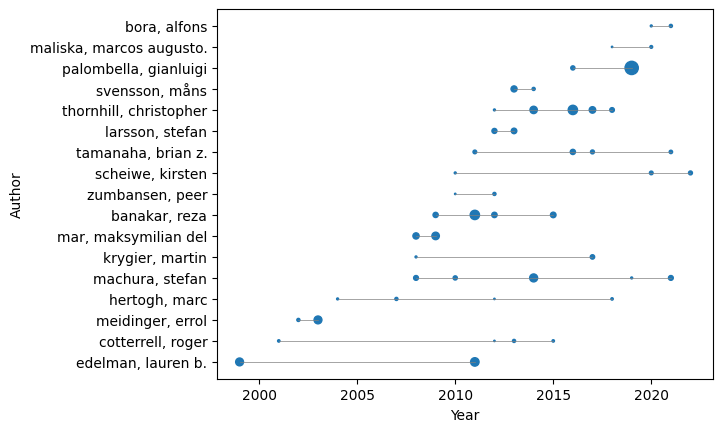

In [47]:
from matplotlib import pyplot as plt
query = """
USE `ehrlich-openalex`
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)-[r:CITES]->(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.display_name <> ", "
WITH a1, a2, count(r) as total_citations, collect(DISTINCT w1.year) as years
WHERE size(years) > 1 and total_citations >= 5
MATCH (a1)-[:CREATOR_OF]->(w1:Work)-[r:CITES]->(w2:Work)<-[:CREATOR_OF]-(a2)
RETURN a1.display_name as author, w1.year as year, count(r) as citations
ORDER BY year
"""
data = graph.run(query).data()
years = [d['year'] for d in data]
authors = [d['author'] for d in data]
citation_counts = [d['citations'] for d in data]

# Create plot
fig, ax = plt.subplots()

# Set the x and y axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Author')

# Scatter plot with citation counts as size
scatter = ax.scatter(years, authors, s=citation_counts)

# Connect the earliest and last point of each author with a line
for author in set(authors):
    author_data = [(d['year'], d['author']) for d in data if d['author'] == author]
    author_data.sort()
    ax.plot(*zip(*author_data), color='grey', linewidth=0.5)

# Show the plot
plt.show()


# Eigene Daten

## Citing authors, 1960-1989

In [ ]:
query = """
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)<-[r3:CREATOR_OF]-(a2:Author)
WHERE toLower(a1.family) = "ehrlich" //and w2.year > 1960 and w2.year < 1990
with a1, a2, count(r2) as num_citations
where num_citations > 0
RETURN  a2 AS source_node,
        apoc.create.vRelationship(a2, 'CITES', {value:num_citations}, a1) as rel,
        a1 as target_node
"""
options = {"Author": "family", "Work": "display_name", "Venue": "name", "CITES":"value"}
draw(graph, query, options, physics=True, db="zfrsoz")

## Citing works, all years

In [ ]:
query = """
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.family = "ehrlich" and a1.given starts with "e"
WITH w2, COLLECT(a2)[0] AS first_author, COLLECT(w1)[0].title AS most_cited, count(w2) as count
RETURN
    first_author.display_name AS author,
    w2.year AS year,
    w2.title AS title,
    most_cited,
    count
ORDER BY count DESC, year
"""


### Zeitschrift für Rechtssoziologie

In [ ]:
table(graph, query, db="zfrsoz")

### Lehrbücher

In [ ]:
table(graph, query, db="rsoz-lehrbuecher")

### JLS

In [ ]:
table(graph, query, db="jls")

## Citing works, 1970-1989

In [ ]:
query = """
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)<-[:CITES]-(w2:Work)<-[:CREATOR_OF]-(a2:Author)
WHERE a1.family = "ehrlich" and a1.given starts with "e" 
AND w2.year > 1960 and w2.year < 1990 
WITH w2, COLLECT(a2)[0] AS first_author, COLLECT(w1)[0].title AS most_cited, count(w2) as count
RETURN
    first_author.display_name AS author,
    w2.year AS year,
    w2.title AS title,
    most_cited,
    count
ORDER BY count DESC, year
"""

### Zeitschrift für Rechtssoziologie

In [ ]:
table(graph, query, db="zfrsoz")

### Lehrbücher

In [ ]:
table(graph, query, db="rsoz-lehrbuecher")

### JLS

In [ ]:
table(graph, query, db="jls")

## Works which cite works citing or referring to Ehrlich

In [ ]:
query = """
MATCH (a1:Author)-[:CREATOR_OF]->(w1:Work)-[:CITES]->(w2:Work)<-[:CREATOR_OF]-(a2:Author)
MATCH (w2)-[:CITES]->(w3:Work)<-[:CREATOR_OF]-(a3:Author)
WHERE ((a2.family = "ehrlich" AND a2.given STARTS WITH "e") 
  OR w2.title CONTAINS "ehrlich"
  OR (a3.family = "ehrlich" AND a3.given STARTS WITH "e"))
  AND w2.year > 1960 AND w2.year < 1990 
RETURN  *
"""
options = {"Author": "display_name",
           "Work": "display_name",
           "Venue": "name"}
#draw(graph, query, options, physics=True, db="rsoz-lehrbuecher")
table(graph, query,db="rsoz-lehrbuecher")